<a href="https://colab.research.google.com/github/pastelpargoal/NO2/blob/main/final_project_pargoal_kei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
from plotnine import *
import plotnine
import numpy as np

import geopandas as gpd
from shapely.geometry import Polygon


In [152]:
# Upload Heat Pump Data - use this one 4/26
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/WS%20Map_all.csv"
hp_df = pd.read_csv(url)  # Try different encoding
hp_df.head()
hp_df.value_counts()

Legal Town     Heat Pump Type                    RNC      Sector  Source Program Name  Utility     Year  LEGAL TOWN     Program   Source Program              Project Measure: Measure Total Quantity
West Hartford  Air Source Heat Pump, Ducted      Not RNC  RES     RES HVAC             Eversource  2023  WEST HARTFORD  Tracksys  Energy Optimization Rebate  1                                          243
Stamford       Air Source Heat Pump, Ducted      Not RNC  RES     RES HVAC             Eversource  2023  STAMFORD       Tracksys  Energy Optimization Rebate  1                                          243
West Hartford  Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             Eversource  2021  WEST HARTFORD  Tracksys  Energy Optimization Rebate  1                                          224
                                                                                                   2022  WEST HARTFORD  Tracksys  Energy Optimization Rebate  1                                          221
Guilford       Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             Eversource  2021  GUILFORD       Tracksys  Energy Optimization Rebate  1                                          207
                                                                                                                                                                                                        ... 
Ansonia        Air Source Heat Pump, Mini Split  Not RNC  C&I     ECB                  UI          2023  ANSONIA        EXP       EXP                         2                                            1
                                                                                                                                                              3                                            1
                                                                                                                        MID       MID                         1                                            1
Woodbury       Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             Eversource  2021  WOODBURY       Tracksys  Energy Optimization Rebate  2                                            1
Ansonia        Air Source Heat Pump, Mini Split  Not RNC  RES     RES HVAC             UI          2020  ANSONIA        CTDSHP    CTDSHP                      1                                            1
Name: count, Length: 2810, dtype: int64

# Understanding Heat Pump Data

In [153]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54814 entries, 0 to 54813
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Legal Town                               54814 non-null  object
 1   Heat Pump Type                           54814 non-null  object
 2   RNC                                      54814 non-null  object
 3   Sector                                   54814 non-null  object
 4   Source Program Name                      41362 non-null  object
 5   Utility                                  54814 non-null  object
 6   Year                                     54814 non-null  int64 
 7   LEGAL TOWN                               54814 non-null  object
 8   Program                                  54814 non-null  object
 9   Source Program                           41362 non-null  object
 10  Project Measure: Measure Total Quantity  54814 non-null  i

In [154]:
hp_df.shape

(54814, 11)

In [155]:
hp_df['Heat Pump Type'].value_counts()

,count
Heat Pump Type,
"Air Source Heat Pump, Mini Split",40567
"Air Source Heat Pump, Ducted",13354
Ground Source Heat Pump,893


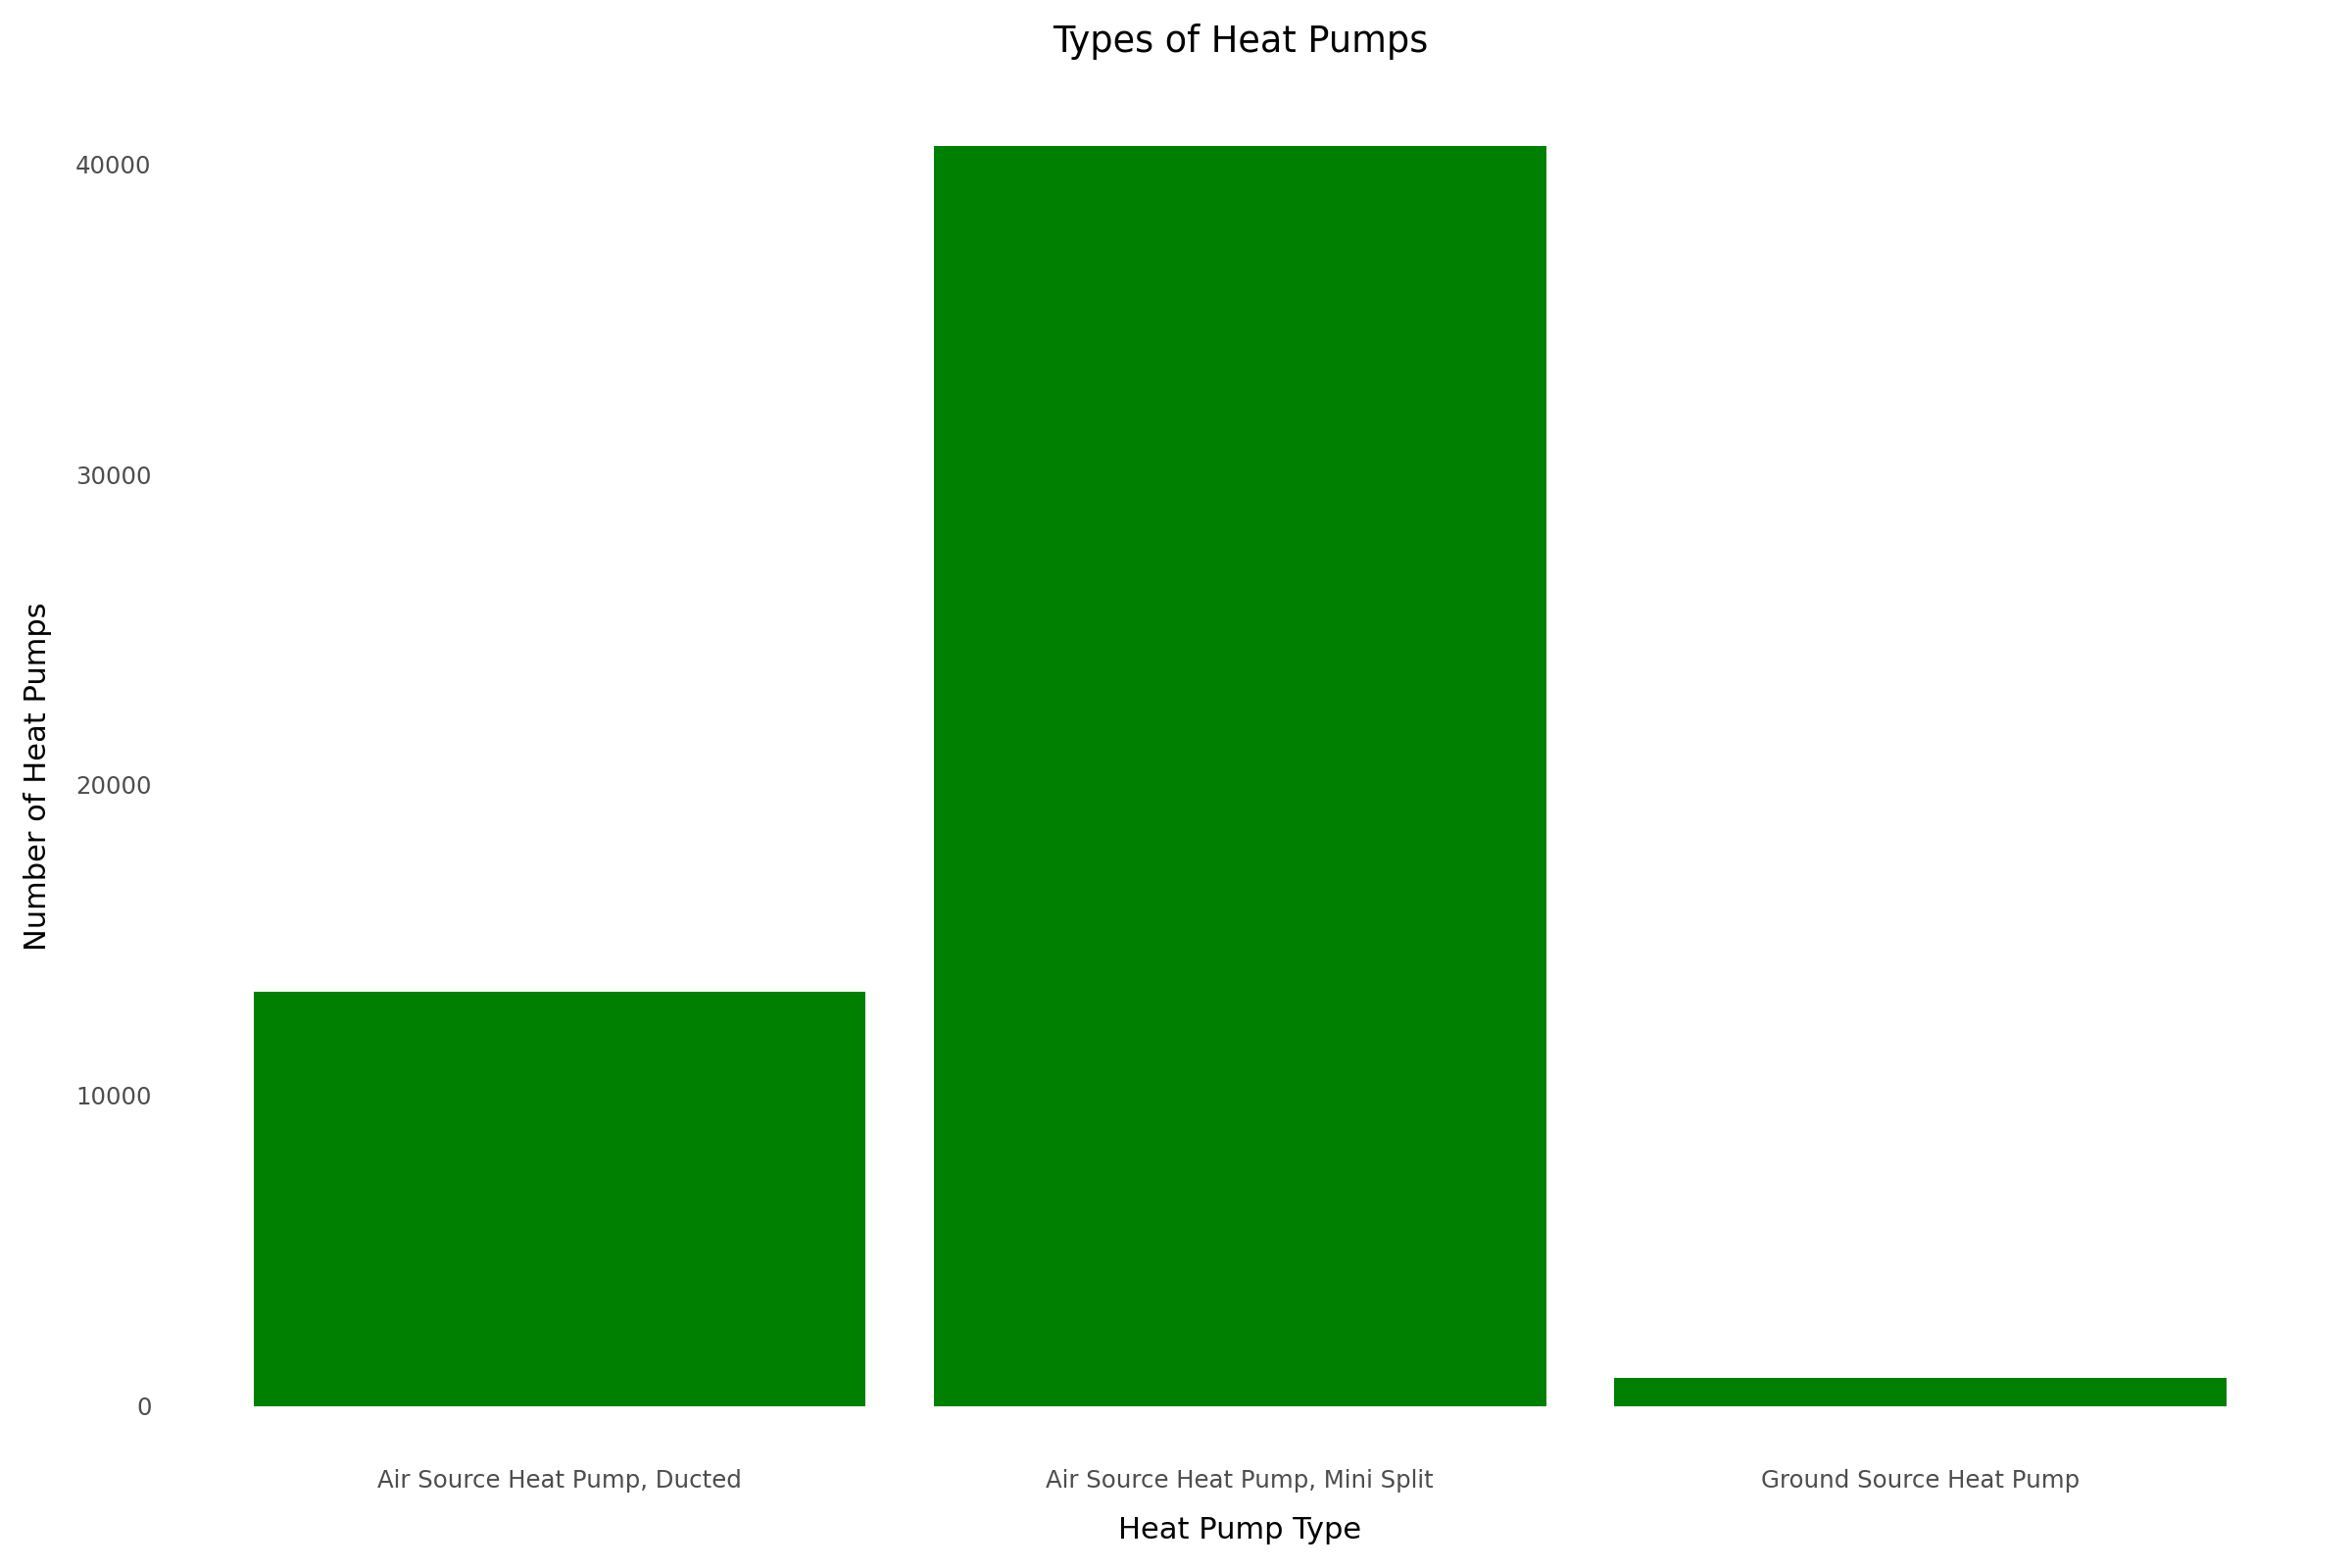

In [156]:
# Plotting by heat pump type
from plotnine import ggplot, aes, geom_bar, labs

plot = (
    ggplot(hp_df, aes(x='Heat Pump Type')) +
    geom_bar(fill="green") +   # <-- set the fill color directly here
    labs(title='Types of Heat Pumps', x='Heat Pump Type', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot


In [157]:
# Legal town is all capitizaled so need to change it to lower case
#hp_df[""]
hp_df.Year.value_counts()

,count
Year,
2023,18920
2022,11342
2021,9677
2020,5163
2019,4366
2018,3108
2017,2238


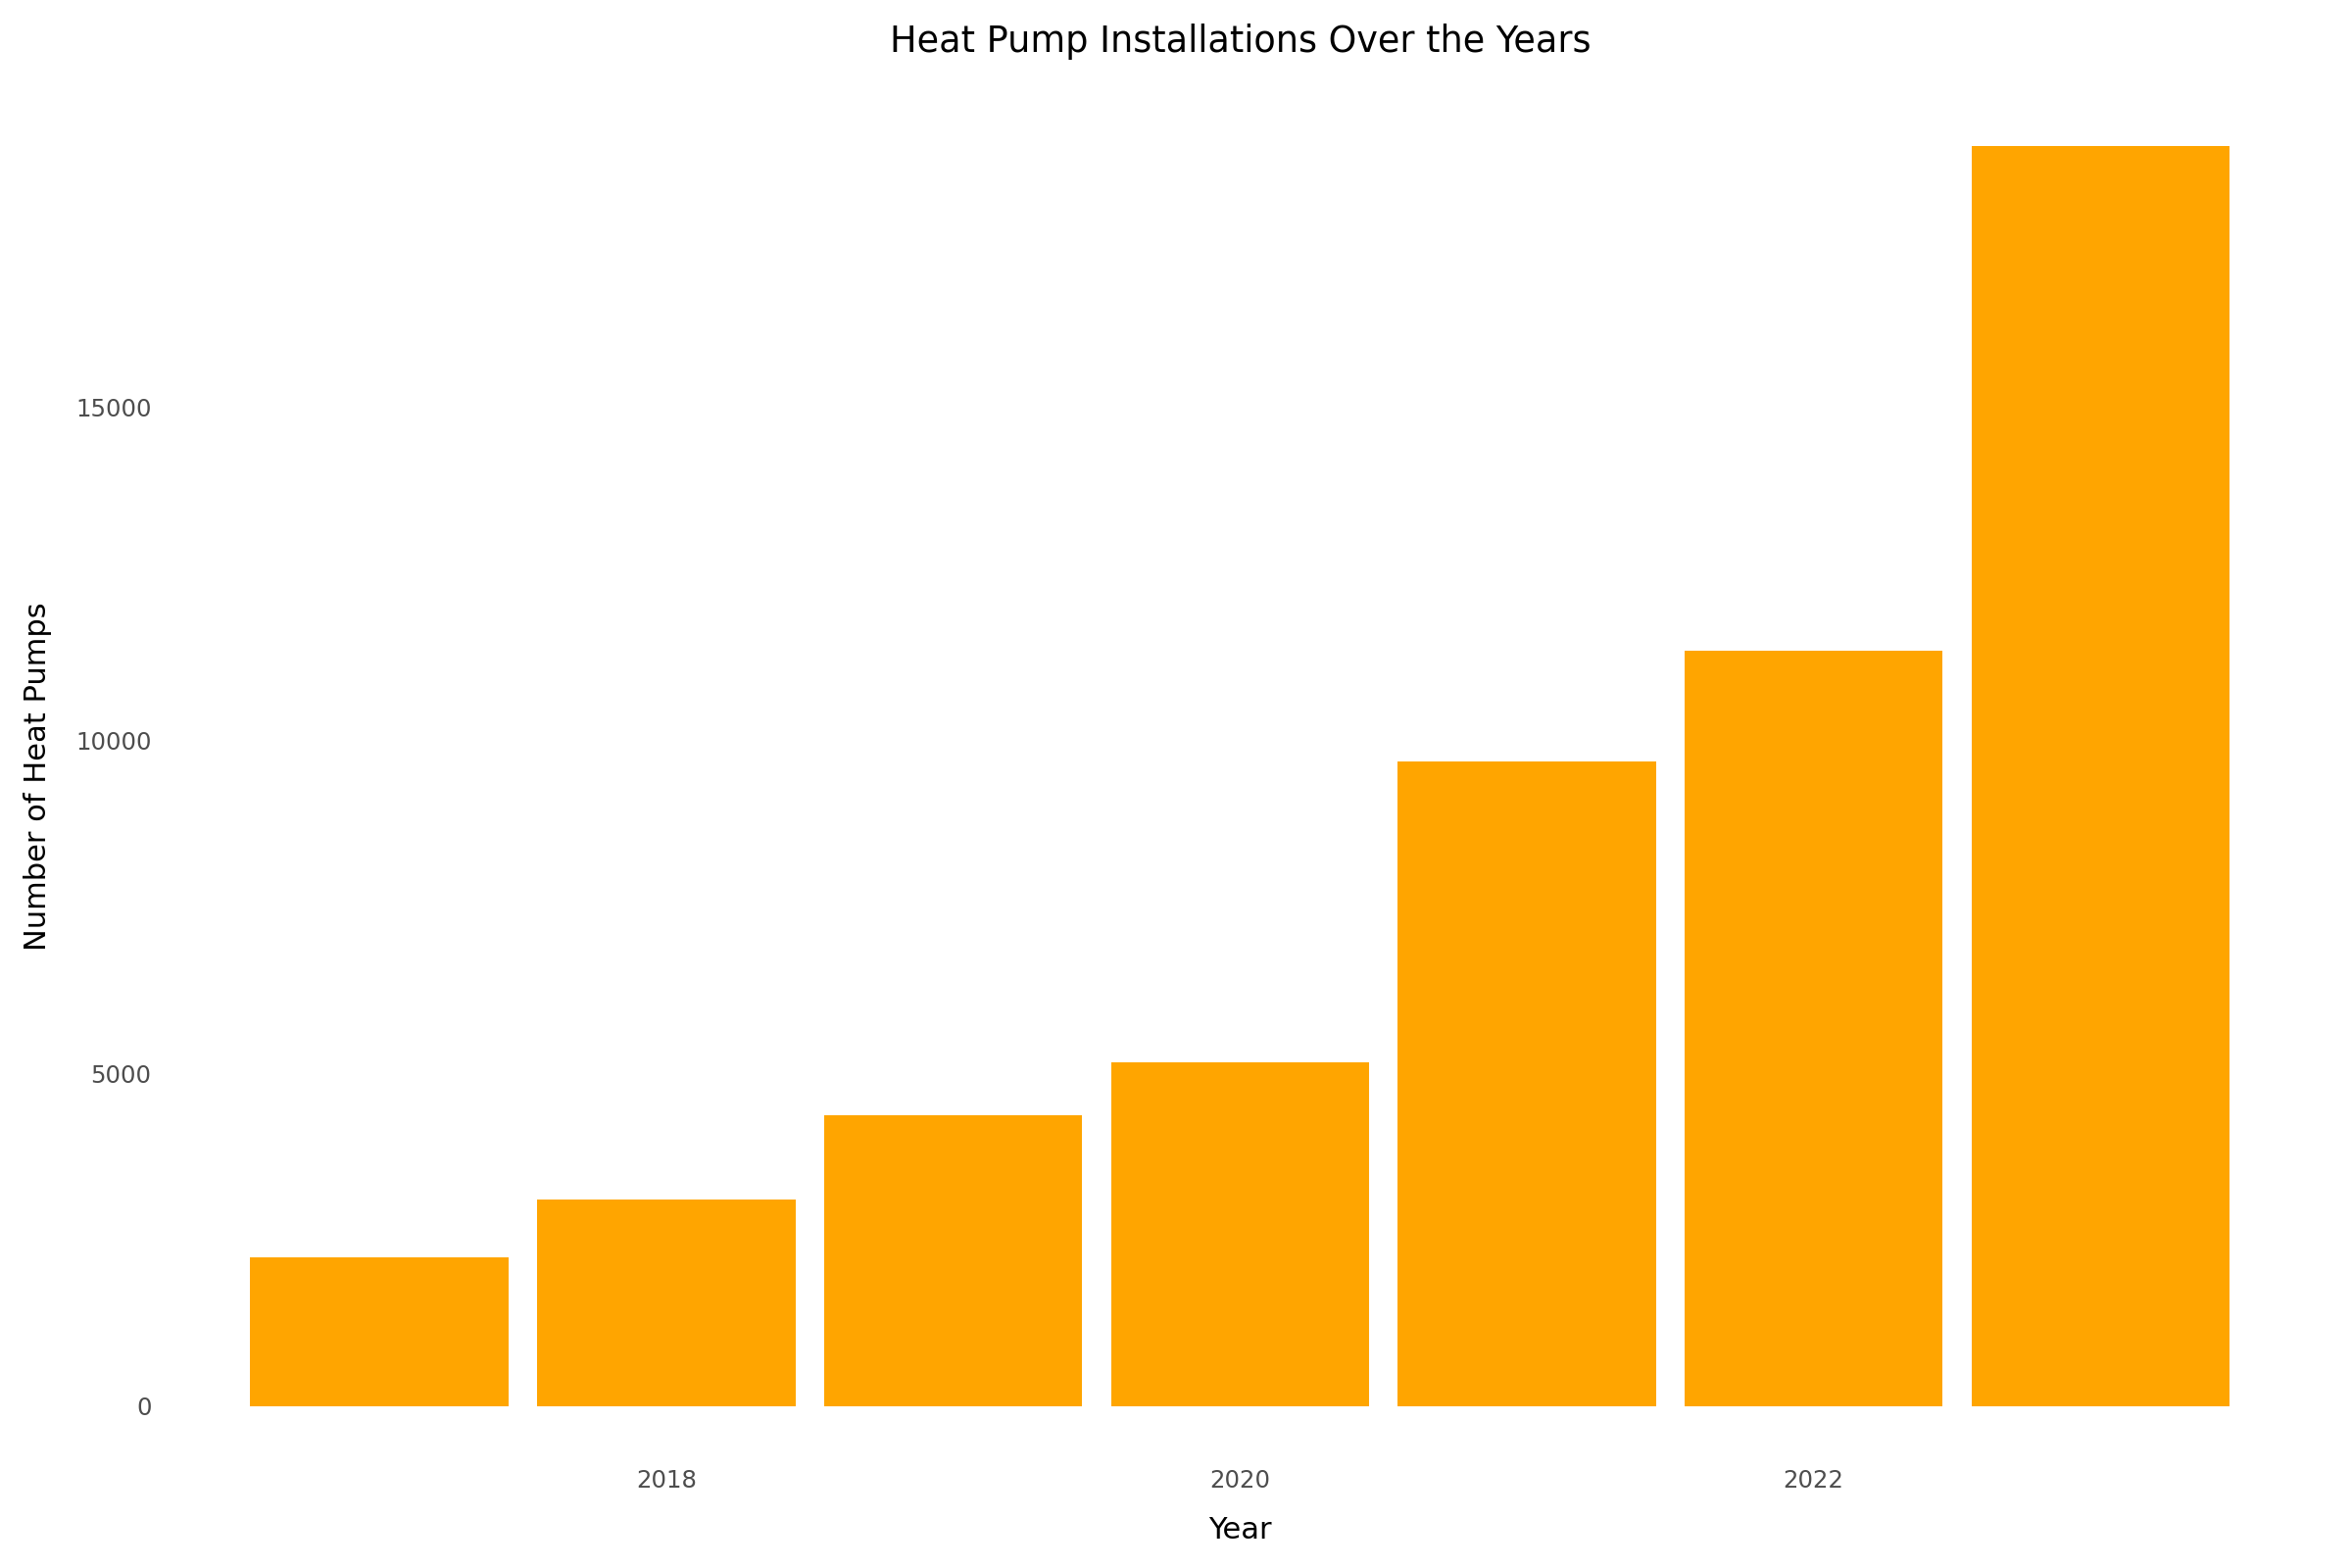

In [158]:
# Plotting by Years
plot = (
    ggplot(hp_df, aes(x='Year')) +
    geom_bar(fill="orange") +
    labs(title='Heat Pump Installations Over the Years', x='Year', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot

In [159]:
hp_df.Utility.value_counts()

,count
Utility,
Eversource,48378
UI,6436


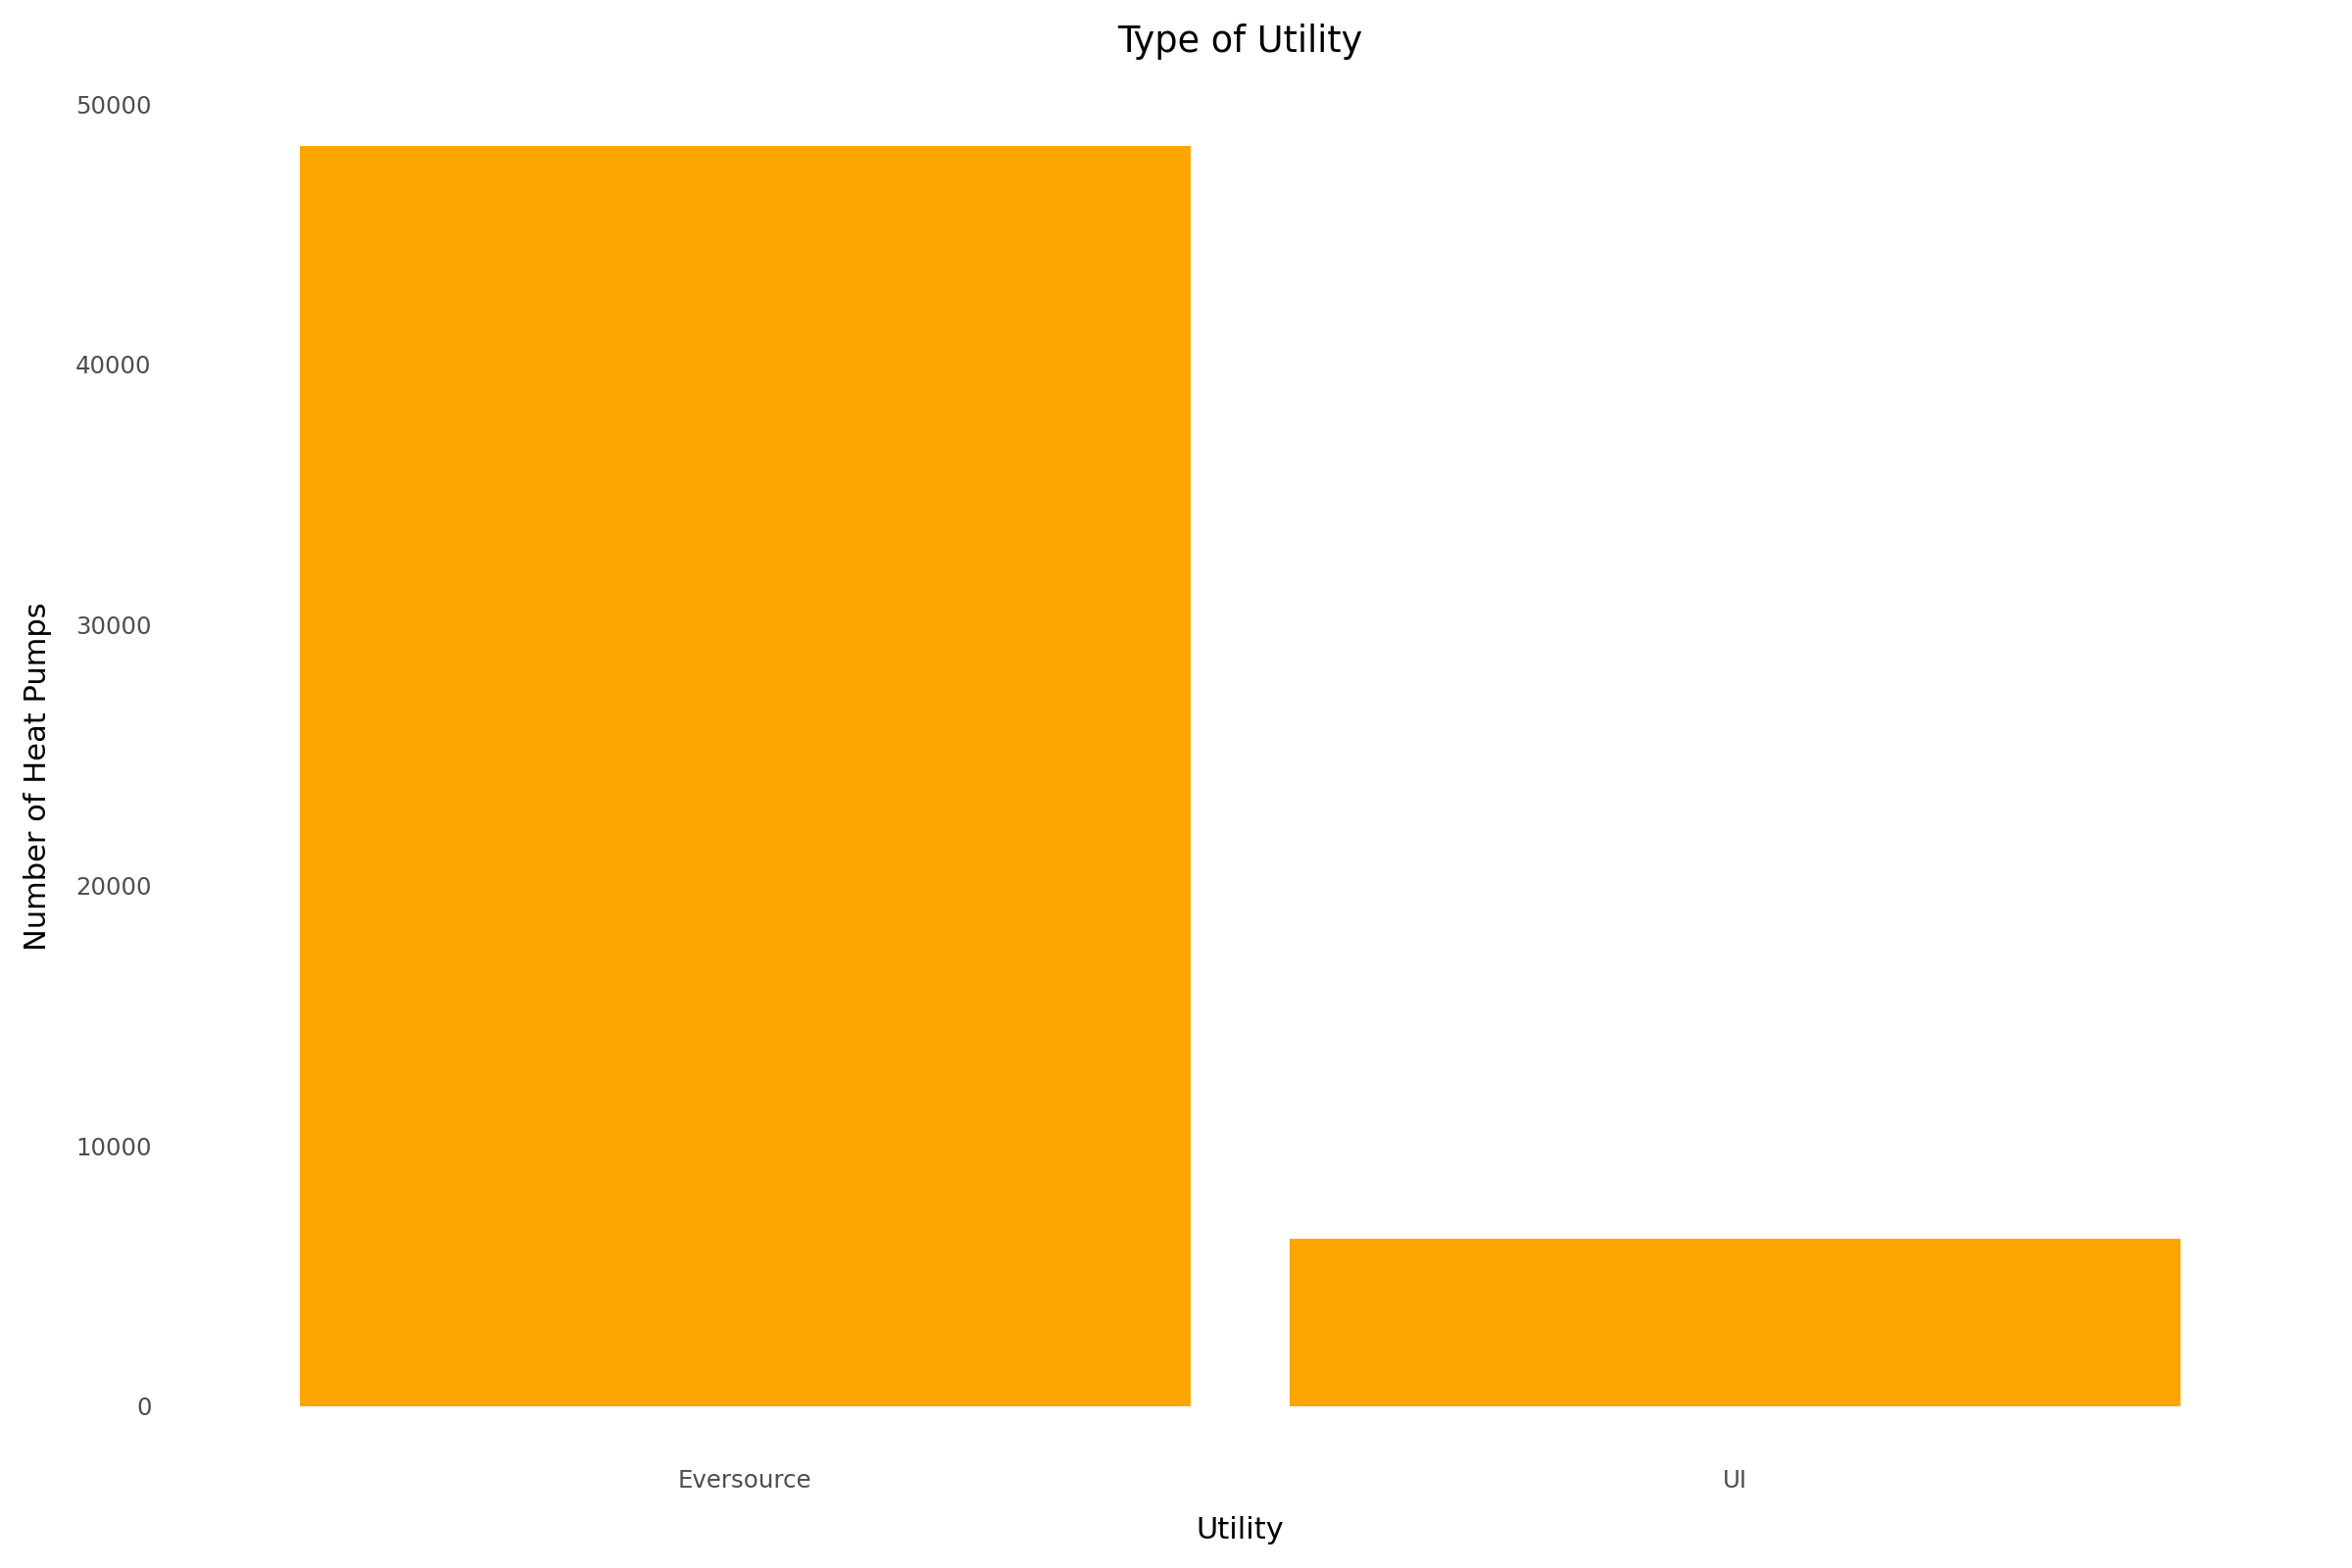

In [160]:
# Plotting by utility
plot = (
    ggplot(hp_df, aes(x='Utility')) +
    geom_bar(fill="orange") +
    labs(title='Type of Utility', x='Utility', y='Number of Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)
plot

In [161]:
# Aggregating the years and heat pump type

# Group by 'Legal Town' and sum the 'Project Measure: Measure Total Quantity'
combined_hp = hp_df.groupby('Legal Town')['Project Measure: Measure Total Quantity'].sum().reset_index()

# Rename the column if you want
combined_hp = combined_hp.rename(columns={'Project Measure: Measure Total Quantity': 'Total Heat Pumps'})
combined_hp = combined_hp.rename(columns={'Legal Town': 'TOWN'})


# View result
combined_hp.head()


,TOWN,Total Heat Pumps
0,Andover,95
1,Ansonia,115
2,Ashford,192
3,Avon,445
4,Barkhamsted,103


In [162]:
# check for NAs
combined_hp.isna().sum()

,0
TOWN,0
Total Heat Pumps,0


In [163]:
# Group by Legal Town and aggregate Utility into a combined string
combined_utilities = hp_df.groupby('Legal Town')['Utility'].unique().reset_index()
combined_utilities['Utility'] = combined_utilities['Utility'].apply(lambda x: ', '.join(x))

print(combined_utilities)
combined_utilities

        Legal Town     Utility
0          Andover  Eversource
1          Ansonia          UI
2          Ashford  Eversource
3             Avon  Eversource
4      Barkhamsted  Eversource
..             ...         ...
161  Windsor Locks  Eversource
162        Wolcott  Eversource
163     Woodbridge          UI
164       Woodbury  Eversource
165      Woodstock  Eversource

[166 rows x 2 columns]


,Legal Town,Utility
0,Andover,Eversource
1,Ansonia,UI
2,Ashford,Eversource
3,Avon,Eversource
4,Barkhamsted,Eversource
...,...,...
161,Windsor Locks,Eversource
162,Wolcott,Eversource
163,Woodbridge,UI
164,Woodbury,Eversource


In [164]:
# number of Legal Towns
combined_hp['TOWN'].nunique()

166

In [165]:
# Uploading Demographic Data (2023)
url = "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/refs/heads/main/CT_demoU.csv"
demo_df = pd.read_csv(url)
demo_df.head()

,TOWN,Median Age,Median Home Value,Unemployment Rate,Per Income Capita,Tenure_Owner_Occupied(%),Tenure_Renter_Occupied(%),Housing Units,TOWN_NO,COUNTY,...,60_to_64_Years,18_to_24_Years,65_and_Over_Years,Total_Households,Median_Household_Income,SNAP_Recipients,Utility_gas,Bottled_tank_or_LP_gas,Electricity,Fuel_oil_kerosene_etc.
0,Andover,47.9,297400,4.7,44803,88.40,11.60,1275.0,1.0,Tolland,...,9.6,9.5,17.7,1216.0,99449.0,2.88,1.4,7.9,5.1,74.6
1,Ansonia,42.4,217800,9.6,30285,59.42,40.58,8867.0,2.0,New Haven,...,8.4,6.5,18.4,7806.0,53709.0,15.60,48.6,1.5,7.9,40.6
2,Ashford,37.8,271700,4.9,46602,73.68,26.32,2033.0,3.0,Windham,...,7.4,7.0,14.2,1774.0,84909.0,8.23,1.1,2.7,16.6,62.6
3,Avon,45.2,371900,4.1,74617,83.27,16.73,8042.0,4.0,Hartford,...,7.6,5.0,20.9,6977.0,123077.0,2.85,43.1,4.5,8.8,42.5
4,Barkhamsted,48.3,262900,5.0,43558,92.66,7.34,1473.0,5.0,Litchfield,...,5.9,6.0,24.0,1336.0,103500.0,2.10,0.7,2.8,7.4,80.7


In [166]:
# subset to just Town, Median Home Value, and Tenure_Owner_Occupied(%), and Tenure_Renter_Occupied(%)
demo_df = demo_df[['TOWN', 'Median_Household_Income', 'Tenure_Owner_Occupied(%)']]
demo_df.head()

,TOWN,Median_Household_Income,Tenure_Owner_Occupied(%)
0,Andover,99449.0,88.40
1,Ansonia,53709.0,59.42
2,Ashford,84909.0,73.68
3,Avon,123077.0,83.27
4,Barkhamsted,103500.0,92.66


In [167]:
# how many towns in demo_df
demo_df['TOWN'].nunique()

170

In [168]:
# check for NAs
demo_df.isna().sum()

,0
TOWN,0
Median_Household_Income,28
Tenure_Owner_Occupied(%),0


In [169]:
# remove NAs
demo_df = demo_df.dropna()

In [170]:
demo_df.isna().shape
# 142 towns left

(142, 3)

# Joining both Demographic Data and Heat Pump Data

In [171]:
joined_df = pd.merge(combined_hp, demo_df, on='TOWN', how='right')
joined_df.head()

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%)
0,Andover,95.0,99449.0,88.40
1,Ansonia,115.0,53709.0,59.42
2,Ashford,192.0,84909.0,73.68
3,Avon,445.0,123077.0,83.27
4,Barkhamsted,103.0,103500.0,92.66


In [172]:
joined_df.shape

(142, 4)

In [173]:
# remove all NAs
joined_df = joined_df.dropna()

In [174]:
joined_df.shape
# end up with 139 towns left that have both income, renters, and

(139, 4)

In [175]:
# create new column for above or below national average of home ownership
joined_df['Above_National_Average'] = joined_df['Tenure_Owner_Occupied(%)'] > 66
joined_df.head()

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%),Above_National_Average
0,Andover,95.0,99449.0,88.40,True
1,Ansonia,115.0,53709.0,59.42,False
2,Ashford,192.0,84909.0,73.68,True
3,Avon,445.0,123077.0,83.27,True
4,Barkhamsted,103.0,103500.0,92.66,True


# Analysis

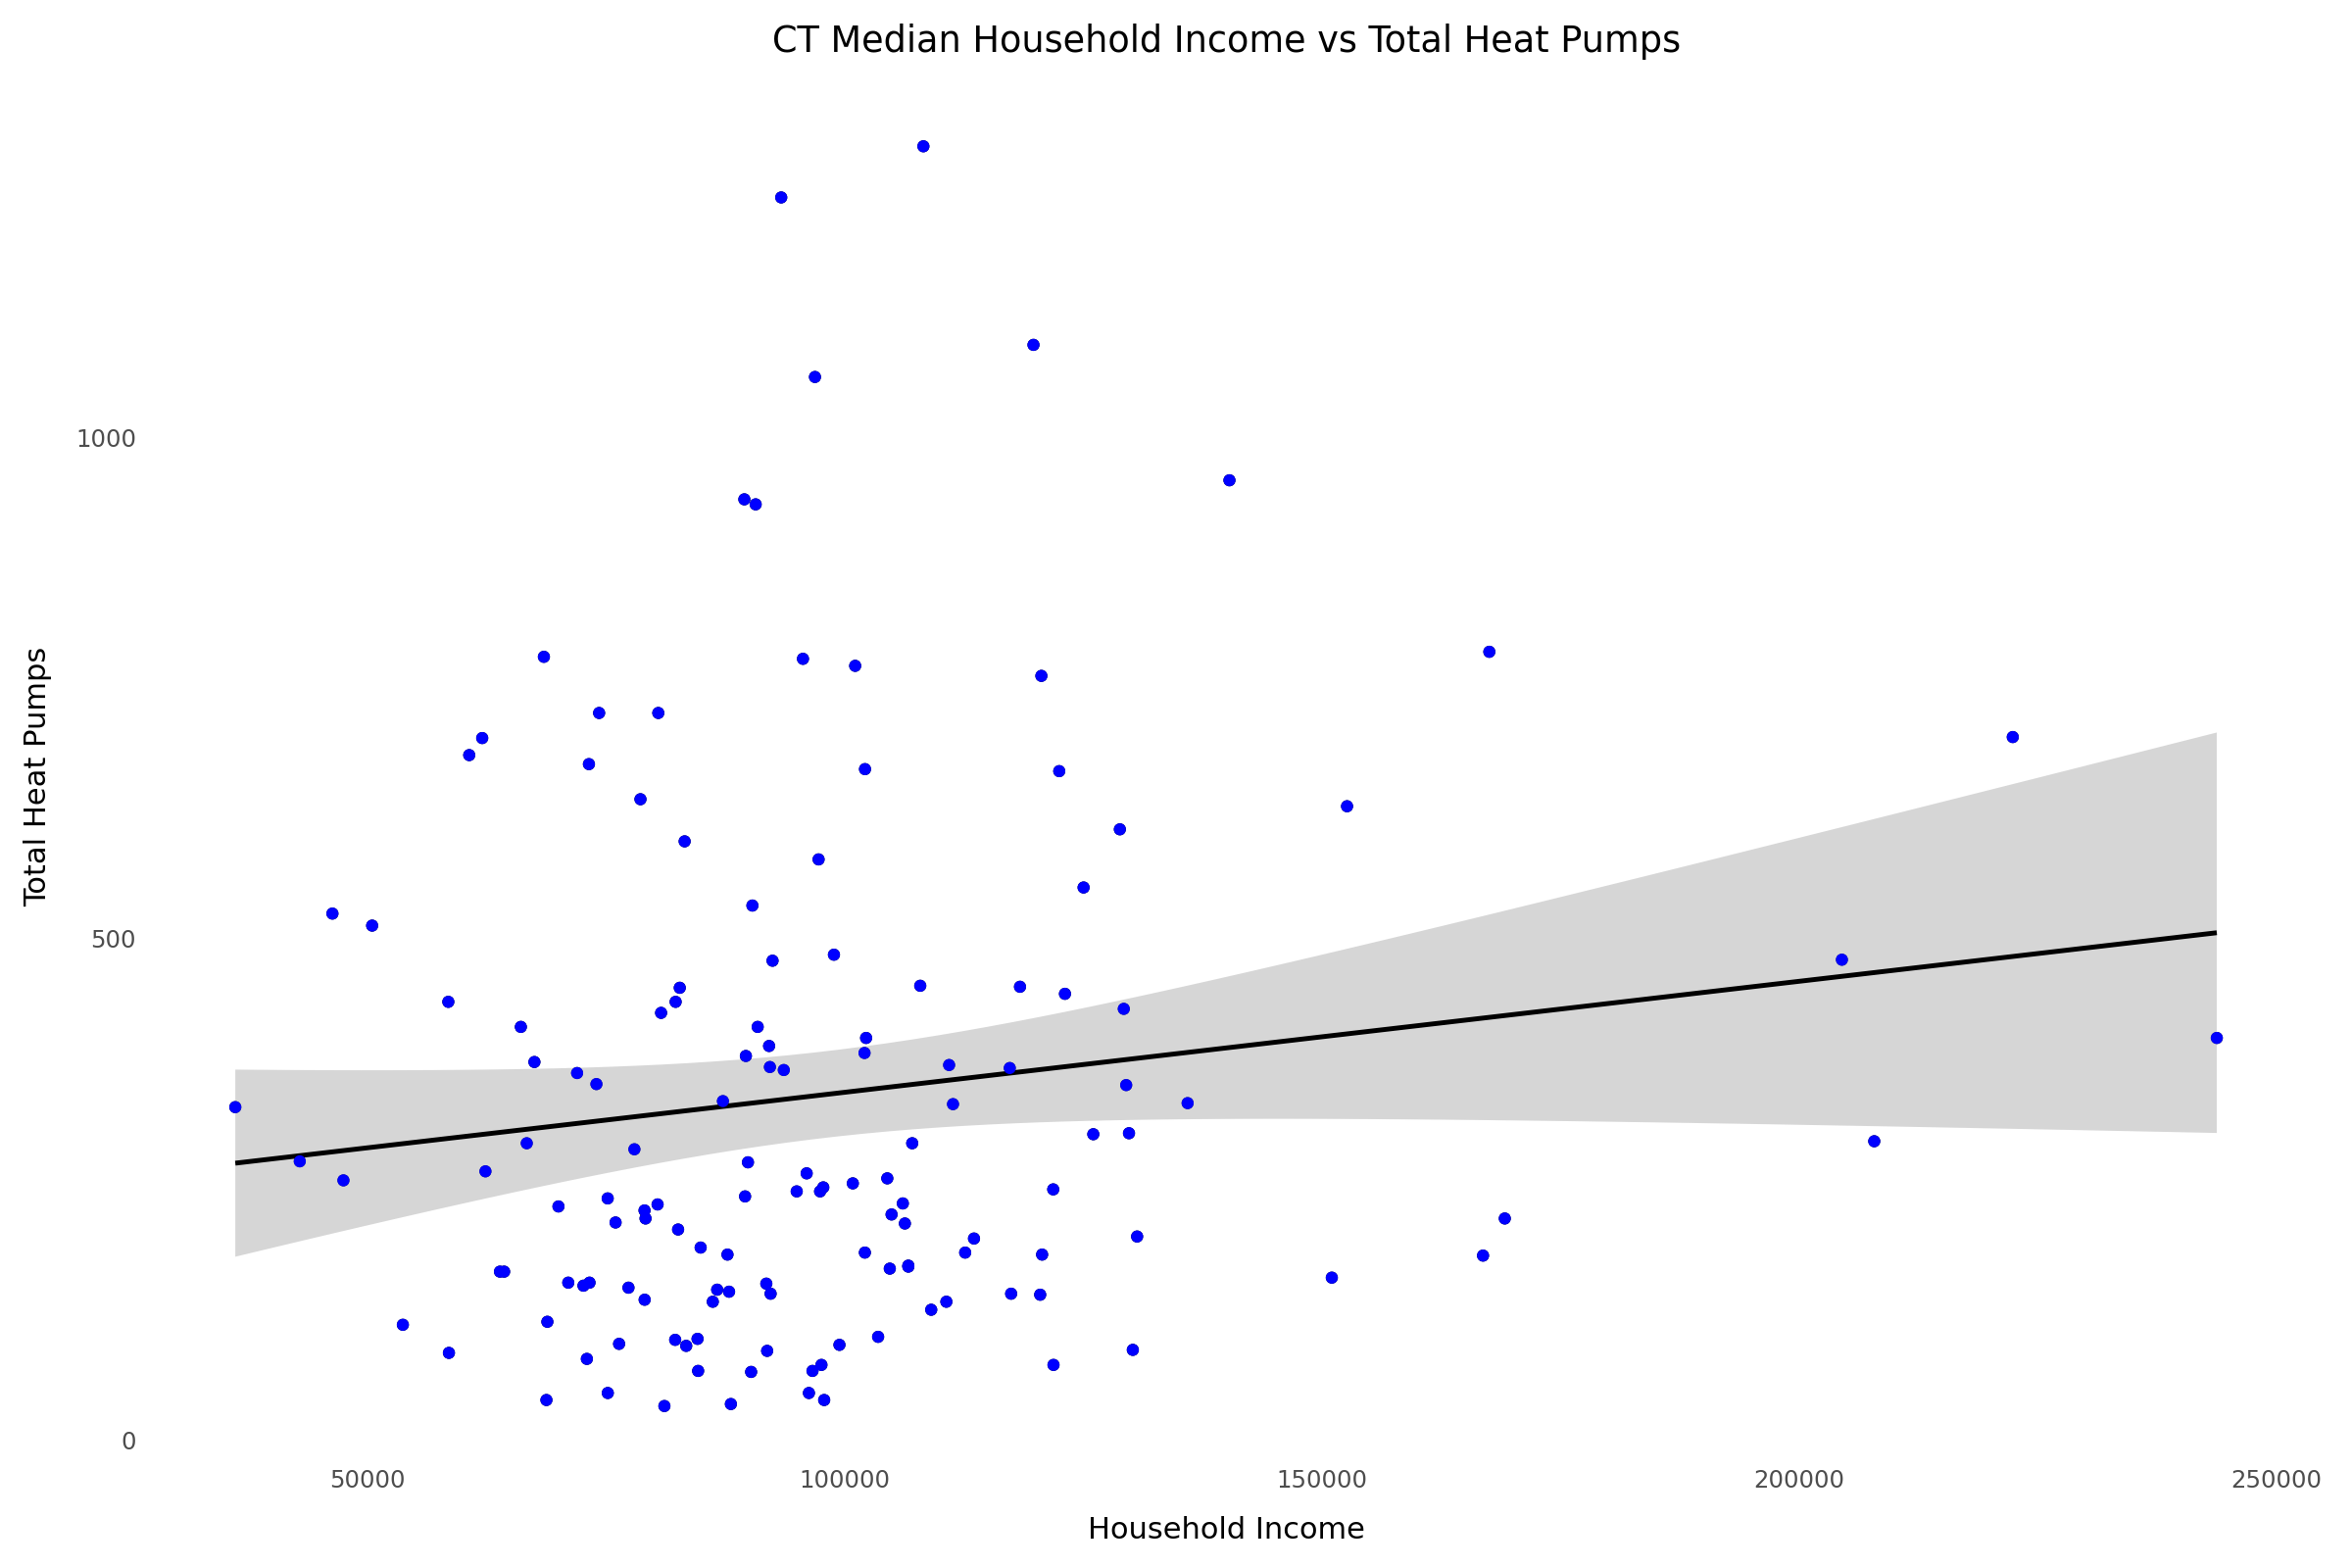

In [176]:
# create plot comparing household income and total heat pumps
(
    ggplot(joined_df, aes(x='Median_Household_Income', y='Total Heat Pumps')) +
    geom_point() +
    geom_smooth(method='lm') +
    theme_minimal() +
    geom_point(color="blue") +
    labs(title='CT Median Household Income vs Total Heat Pumps', x='Household Income', y='Total Heat Pumps') +
    theme_minimal() +  # white background
    theme(
        panel_grid_major=element_blank(),  # remove major gridlines
        panel_grid_minor=element_blank(),  # remove minor gridlines
    )
)

In [177]:
# do linear regression test to see correlation
import statsmodels.api as sm

# define model
model = sm.OLS(joined_df['Total Heat Pumps'], joined_df['Median_Household_Income'])

# fit model
results = model.fit()

# print results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Total Heat Pumps   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              223.7
Date:                Sun, 27 Apr 2025   Prob (F-statistic):                    1.14e-30
Time:                        00:41:18   Log-Likelihood:                         -973.25
No. Observations:                 139   AIC:                                      1948.
Df Residuals:                     138   BIC:                                      1951.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [178]:
# second analysis - T-test
import scipy.stats as stats

stats.ttest_ind(joined_df['Total Heat Pumps'][joined_df['Above_National_Average'] == True],
                joined_df['Total Heat Pumps'][joined_df['Above_National_Average'] == False])

TtestResult(statistic=np.float64(-1.9130508408116251), pvalue=np.float64(0.05782804761765743), df=np.float64(137.0))

## Uploading Spatial Data - CT Shapefile

In [179]:
# 7:52
!wget -O Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip "https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/main/Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip"

--2025-04-27 00:41:20--  https://raw.githubusercontent.com/envirodatascience/final-project-pargoal-kei-team/main/Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3301614 (3.1M) [application/zip]
Saving to: ‘Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip’

Connecticut_and_Vic 100%[===================>]   3.15M  --.-KB/s    in 0.06s   

2025-04-27 00:41:20 (54.7 MB/s) - ‘Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip’ saved [3301614/3301614]



In [180]:
#7:52
!unzip Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip

Archive:  Connecticut_and_Vicinity_Town_Boundary_Set_-1419719285420626778.zip
replace CT_Vicinity_Town_Polygon.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CT_Vicinity_Town_Polygon.cpg  
replace CT_Vicinity_Town_Polygon.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CT_Vicinity_Town_Polygon.dbf  
replace CT_Vicinity_Town_Polygon.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CT_Vicinity_Town_Polygon.prj  
replace CT_Vicinity_Town_Polygon.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CT_Vicinity_Town_Polygon.shp  
replace CT_Vicinity_Town_Polygon.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CT_Vicinity_Town_Polygon.shx  


In [181]:
shape = 'CT_Vicinity_Town_Polygon.shp'
df_CTT = gpd.read_file(shape)
df_CTT.head()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: CT_Vicinity_Town_Polygon.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.


,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,TOWN_NAME,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
0,Land,Other States,MA,Massachusetts,FIPS-COUNTY,27.0,Worcester,TOWN-ID,Uxbridge,True,Uxbridge,None,Uxbridge,"POLYGON ((1314474.251 950430.875, 1314007.251 ..."
1,Land,Other States,MA,Massachusetts,FIPS-COUNTY,21.0,Norfolk,TOWN-ID,Foxborough,True,Foxborough,None,Foxborough,"POLYGON ((1426805.375 949926.625, 1421795.625 ..."
2,Land,Other States,MA,Massachusetts,FIPS-COUNTY,27.0,Worcester,TOWN-ID,Southbridge,True,Southbridge,None,Southbridge,"POLYGON ((1205552.751 952445.875, 1205636.501 ..."
3,Land,Other States,MA,Massachusetts,FIPS-COUNTY,5.0,Bristol,TOWN-ID,Easton,True,Easton,None,Easton,"POLYGON ((1437395.589 928737.738, 1437395.589 ..."
4,Land,Other States,MA,Massachusetts,FIPS-COUNTY,13.0,Hamden,TOWN-ID,Agawam,True,Agawam,None,Agawam,"POLYGON ((1043830.001 959124.501, 1043763.375 ..."


In [182]:
df_CTT.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LAND_CLASS  1780 non-null   object  
 1   CT_LEGEND   1780 non-null   object  
 2   STATE_COD   1779 non-null   object  
 3   STATE_NAME  1779 non-null   object  
 4   CNTY_FIELD  1774 non-null   object  
 5   CNTY_COD    1780 non-null   float64 
 6   CNTY_NAME   1770 non-null   object  
 7   TOWN_FIELD  1774 non-null   object  
 8   TOWN_NAME   1770 non-null   object  
 9   LABEL_FLAG  1780 non-null   object  
 10  MAP_LABEL   655 non-null    object  
 11  CT_LABEL_Y  169 non-null    object  
 12  CT_LABEL_N  486 non-null    object  
 13  geometry    1780 non-null   geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 194.8+ KB


In [183]:
df_CTT.shape

(1780, 14)

In [184]:
CONN = df_CTT[df_CTT.CT_LEGEND == "Connecticut"]
# CT_LEGEND == "Connecticut"
CONN.head()

,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,TOWN_NAME,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
22,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Salisbury,True,Salisbury,Salisbury,None,"POLYGON ((839572.437 943276.875, 838568.251 94..."
25,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,North Canaan,True,North Canaan,North Canaan,None,"POLYGON ((851614.937 942698.187, 849750.437 94..."
26,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Norfolk,True,Norfolk,Norfolk,None,"POLYGON ((885330.625 941199.187, 881530.687 94..."
27,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Colebrook,True,Colebrook,Colebrook,None,"POLYGON ((917666.875 939747.251, 916177.375 93..."
28,Land,Connecticut,CT,Connecticut,CNTY_COD,2.0,Hartford,TOWN_NO,Hartland,True,Hartland,Hartland,None,"POLYGON ((937783.125 939127.187, 937564.251 93..."


In [185]:
CONN = CONN.rename(columns={'TOWN_NAME': 'TOWN'})
CONN.head()

,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,TOWN,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
22,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Salisbury,True,Salisbury,Salisbury,None,"POLYGON ((839572.437 943276.875, 838568.251 94..."
25,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,North Canaan,True,North Canaan,North Canaan,None,"POLYGON ((851614.937 942698.187, 849750.437 94..."
26,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Norfolk,True,Norfolk,Norfolk,None,"POLYGON ((885330.625 941199.187, 881530.687 94..."
27,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,Colebrook,True,Colebrook,Colebrook,None,"POLYGON ((917666.875 939747.251, 916177.375 93..."
28,Land,Connecticut,CT,Connecticut,CNTY_COD,2.0,Hartford,TOWN_NO,Hartland,True,Hartland,Hartland,None,"POLYGON ((937783.125 939127.187, 937564.251 93..."


In [186]:
print(df_CTT)

     LAND_CLASS     CT_LEGEND STATE_COD     STATE_NAME   CNTY_FIELD  CNTY_COD  \
0          Land  Other States        MA  Massachusetts  FIPS-COUNTY      27.0   
1          Land  Other States        MA  Massachusetts  FIPS-COUNTY      21.0   
2          Land  Other States        MA  Massachusetts  FIPS-COUNTY      27.0   
3          Land  Other States        MA  Massachusetts  FIPS-COUNTY       5.0   
4          Land  Other States        MA  Massachusetts  FIPS-COUNTY      13.0   
...         ...           ...       ...            ...          ...       ...   
1775       Land  Other States        NY       New York     CNTYCODE      47.0   
1776       Land  Other States        NY       New York     CNTYCODE      47.0   
1777       Land  Other States        NY       New York     CNTYCODE      47.0   
1778       Land  Other States        NY       New York     CNTYCODE      47.0   
1779      Water         Water        CT    Connecticut         None       0.0   

      CNTY_NAME TOWN_FIELD 

In [187]:
df_CTT.shape

(1780, 14)

In [ ]:
#df_CTT = df_CTT.dropna()

In [ ]:
joined_df

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%),Above_National_Average
0,Andover,95.0,99449.0,88.40,True
1,Ansonia,115.0,53709.0,59.42,False
2,Ashford,192.0,84909.0,73.68,True
3,Avon,445.0,123077.0,83.27,True
4,Barkhamsted,103.0,103500.0,92.66,True
...,...,...,...,...,...
137,Windsor,393.0,92079.0,82.71,True
138,Wolcott,266.0,96014.0,84.86,True
139,Woodbridge,221.0,169155.0,88.09,True
140,Woodbury,256.0,100850.0,77.77,True


In [188]:
df = pd.merge(joined_df, CONN, on='TOWN', how='left')
df

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%),Above_National_Average,LAND_CLASS,CT_LEGEND,STATE_COD,STATE_NAME,CNTY_FIELD,CNTY_COD,CNTY_NAME,TOWN_FIELD,LABEL_FLAG,MAP_LABEL,CT_LABEL_Y,CT_LABEL_N,geometry
0,Andover,95.0,99449.0,88.40,True,Land,Connecticut,CT,Connecticut,CNTY_COD,7.0,Tolland,TOWN_NO,True,Andover,Andover,None,"POLYGON ((1115088.375 830093.313, 1114712.001 ..."
1,Ansonia,115.0,53709.0,59.42,False,Land,Connecticut,CT,Connecticut,CNTY_COD,5.0,New Haven,TOWN_NO,True,Ansonia,Ansonia,None,"POLYGON ((918430.437 692254.125, 917970.437 69..."
2,Ashford,192.0,84909.0,73.68,True,Land,Connecticut,CT,Connecticut,CNTY_COD,8.0,Windham,TOWN_NO,True,Ashford,Ashford,None,"POLYGON ((1173269.125 864417.001, 1173305.501 ..."
3,Avon,445.0,123077.0,83.27,True,Land,Connecticut,CT,Connecticut,CNTY_COD,2.0,Hartford,TOWN_NO,True,Avon,Avon,None,"POLYGON ((987088.063 853913.063, 986925.001 85..."
4,Barkhamsted,103.0,103500.0,92.66,True,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,True,Barkhamsted,Barkhamsted,None,"POLYGON ((957382.625 896606.187, 957678.937 89..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Windsor,393.0,92079.0,82.71,True,Land,Connecticut,CT,Connecticut,CNTY_COD,2.0,Hartford,TOWN_NO,True,Windsor,Windsor,None,"POLYGON ((1014491.375 896864.501, 1010448.313 ..."
676,Wolcott,266.0,96014.0,84.86,True,Land,Connecticut,CT,Connecticut,CNTY_COD,5.0,New Haven,TOWN_NO,True,Wolcott,Wolcott,None,"POLYGON ((946465.875 763592.501, 946638.187 76..."
677,Woodbridge,221.0,169155.0,88.09,True,Land,Connecticut,CT,Connecticut,CNTY_COD,5.0,New Haven,TOWN_NO,True,Woodbridge,Woodbridge,None,"POLYGON ((943611.813 704457.063, 940720.937 70..."
678,Woodbury,256.0,100850.0,77.77,True,Land,Connecticut,CT,Connecticut,CNTY_COD,3.0,Litchfield,TOWN_NO,True,Woodbury,Woodbury,None,"POLYGON ((891837.687 764209.875, 891734.437 76..."


In [146]:
# geo
import geopandas as gpd

# plotting
from plotnine import *
import plotnine

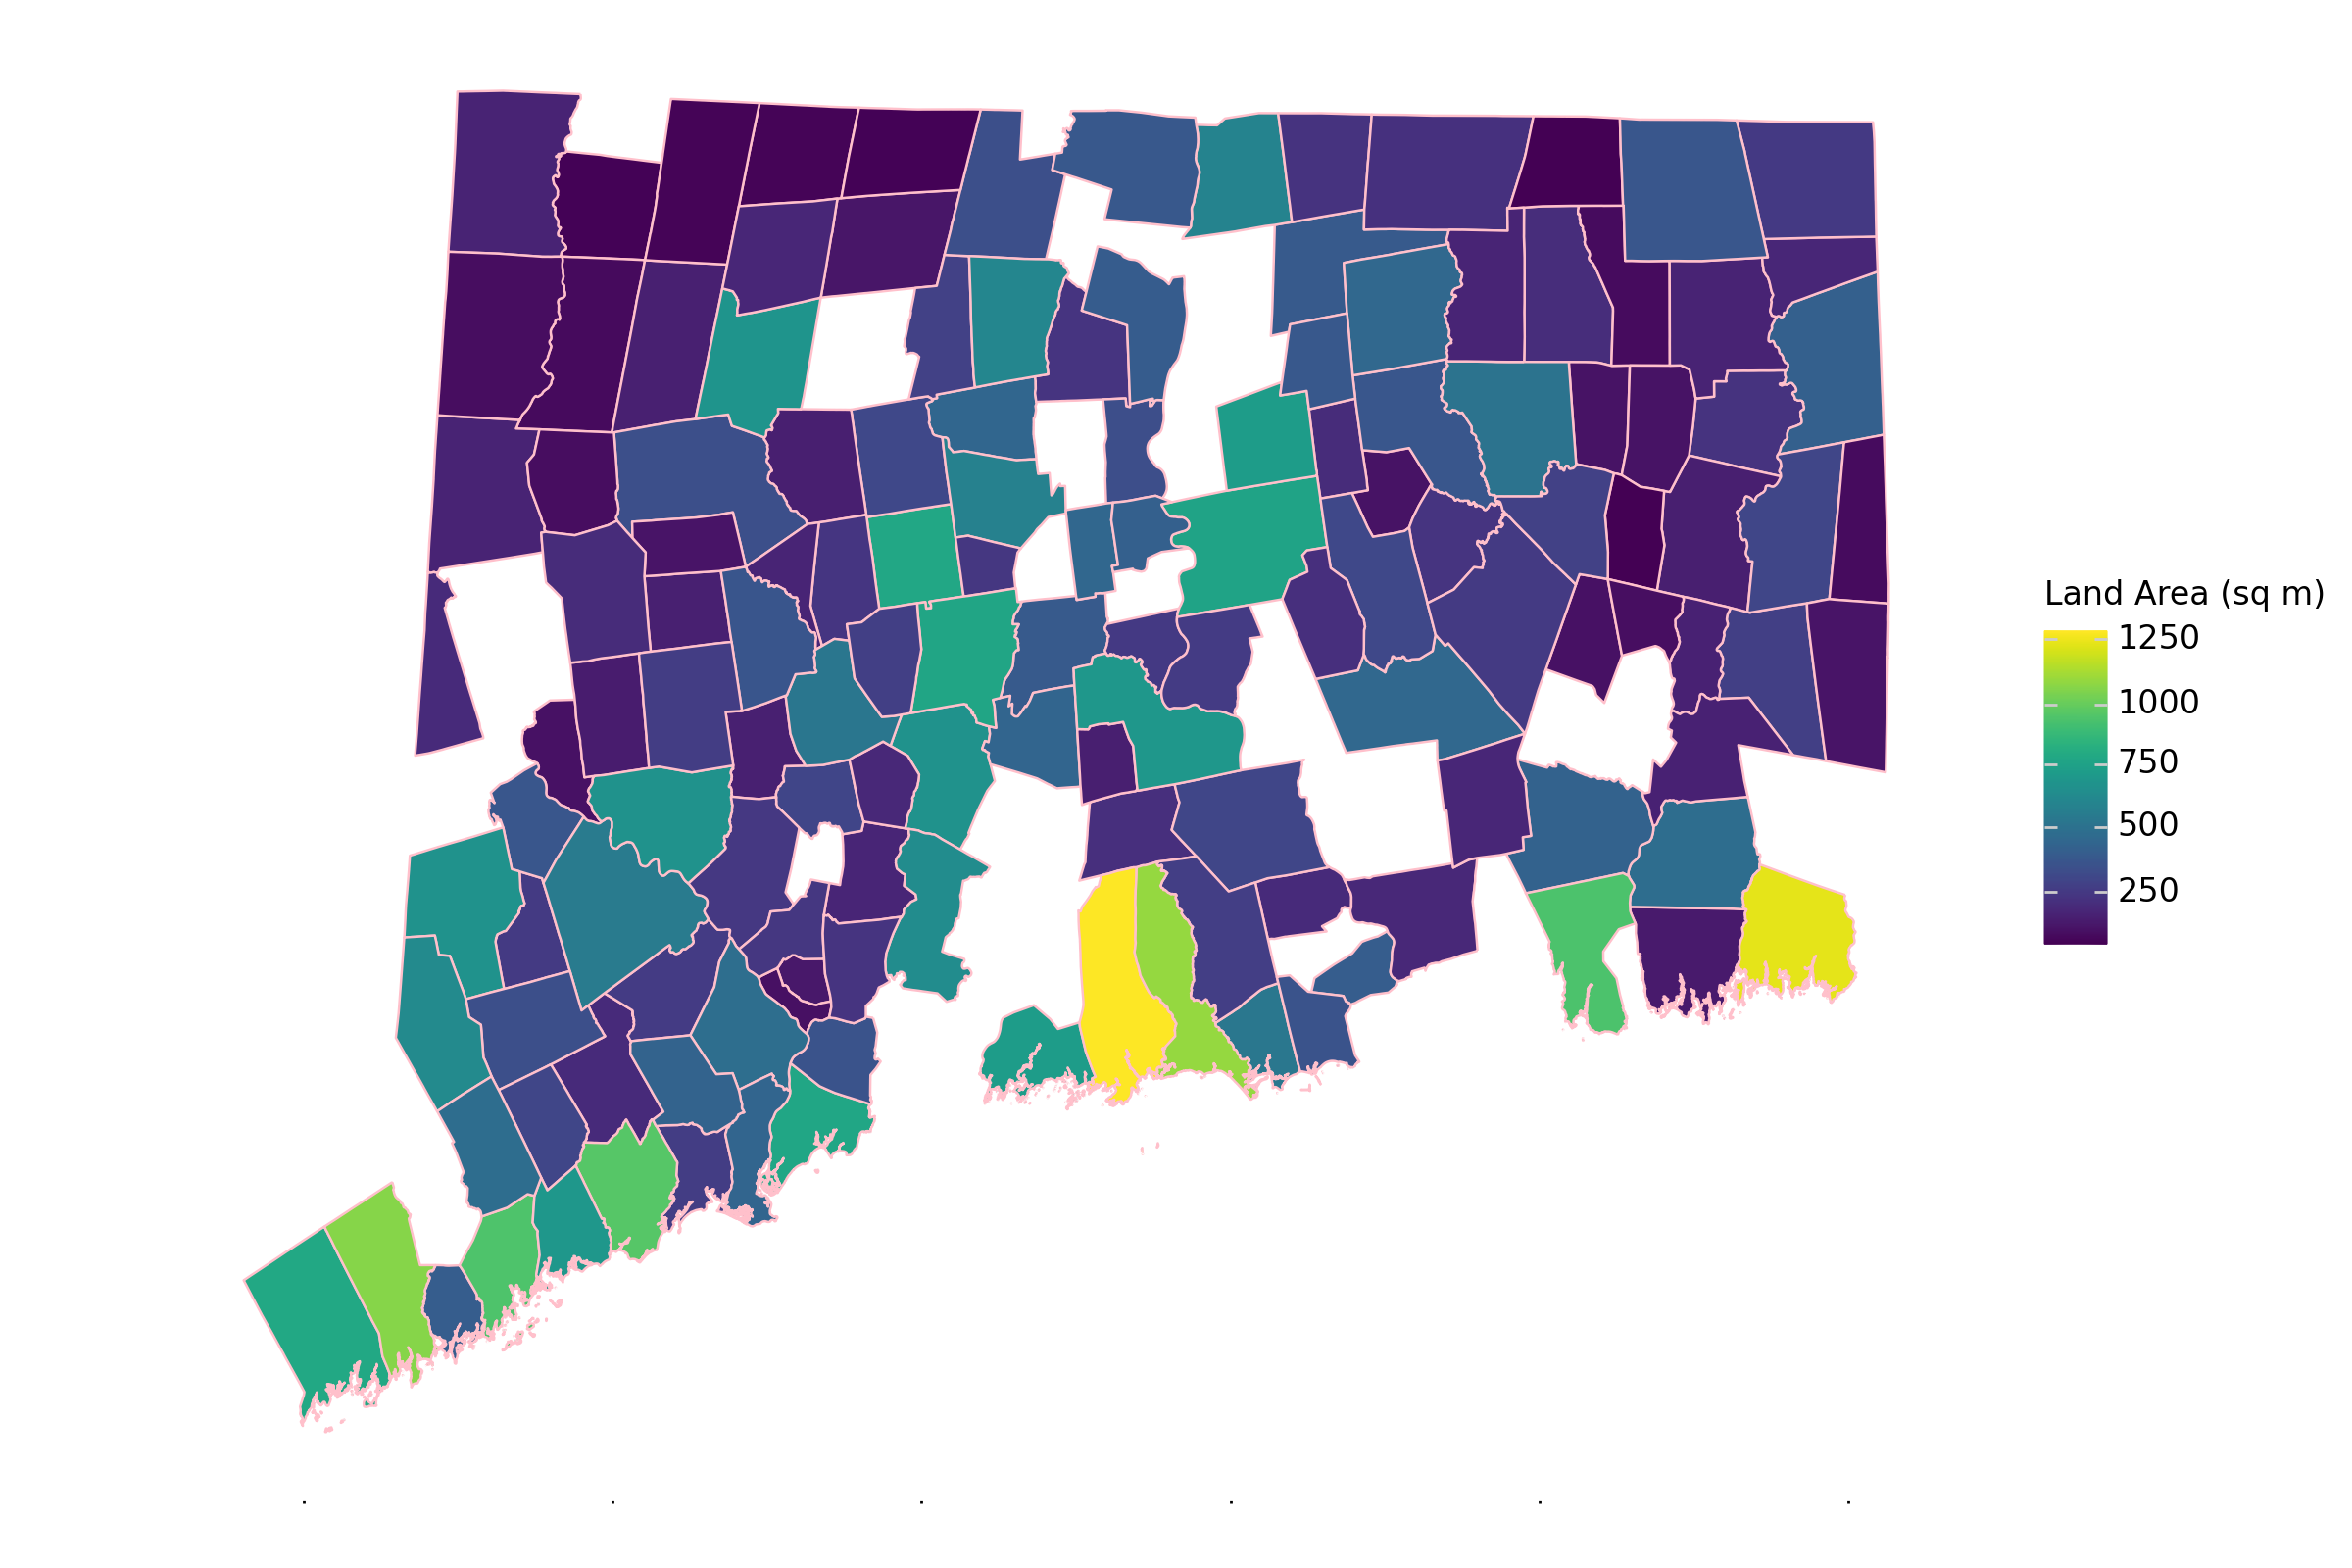

In [189]:
plotnine.options.figure_size = (12, 8)


(ggplot()
  + geom_map(df, aes(geometry = 'geometry', fill='Total Heat Pumps'), color='pink')
  #+ xlim(-5e6,3e6)
 # + ylim(-2.5e6, 4e6)
  + labs(fill='Land Area (sq m)')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
  # + xlab("")
  # + ylab("")
 )

<Axes: >

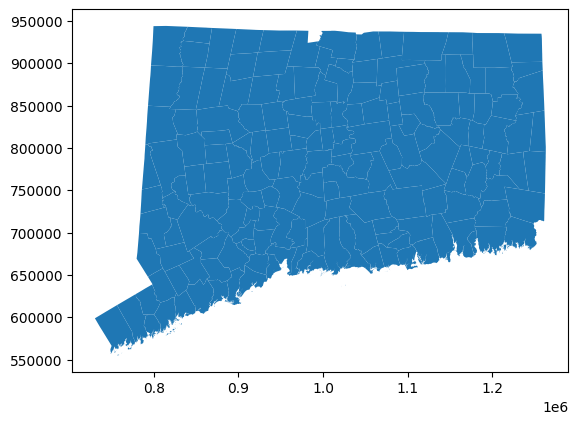

In [139]:
CONN.plot()

In [ ]:
df = pd.merge(joined_df, df_CT, on='TOWN', how='left')
df
# Left tyring to join the spatial data with the heat pump/demographic data - 4/26 - 12:33 pm

,TOWN,Total Heat Pumps,Median_Household_Income,Tenure_Owner_Occupied(%),Above_National_Average,STATEFP,PLACEFP,PLACENS,GEOID,NAMELSAD,...,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,Andover,95.0,99449.0,88.40,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,Ansonia,115.0,53709.0,59.42,False,09,01150,02378267,0901150,Ansonia city,...,C1,N,N,G4110,A,15588608.0,435200.0,+41.3442494,-073.0698254,"POLYGON ((-73.10219 41.35302, -73.10202 41.353..."
2,Ashford,192.0,84909.0,73.68,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,Avon,445.0,123077.0,83.27,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,Barkhamsted,103.0,103500.0,92.66,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Windsor,393.0,92079.0,82.71,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
135,Wolcott,266.0,96014.0,84.86,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
136,Woodbridge,221.0,169155.0,88.09,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
137,Woodbury,256.0,100850.0,77.77,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
# geo
import geopandas as gpd

# plotting
from plotnine import *
import plotnine

In [ ]:
df.plot